In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



In [3]:
df = pd.read_csv('..\\data\\real_data\\analysis\\analysis_df.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

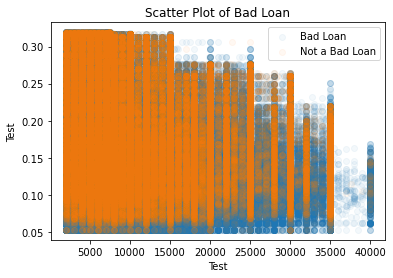

In [5]:
X = df.drop('bad_loan', axis=1)
y = df['bad_loan']

X_arr = np.array(X)
y_arr = np.array(y)
counter = Counter(y_arr)
# print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_arr == label)[0]
    plt.scatter(X_arr[row_ix, 0], X_arr[row_ix, 1], label=str(label), alpha=.05)
plt.legend(['Bad Loan', 'Not a Bad Loan'])
plt.title(f'Scatter Plot of Bad Loan')
plt.xlabel('Test')
plt.ylabel('Test')
plt.show()

C:\Users\vinee\anaconda3\envs\milestone3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_borrowed', ylabel='borrower_rate'>

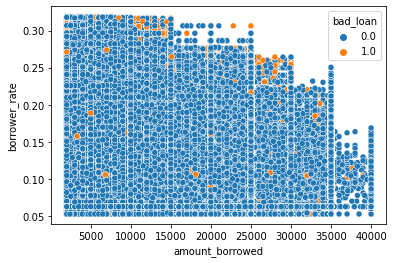

In [44]:
sns.scatterplot('amount_borrowed', 'borrower_rate', data=df, hue='bad_loan')

In [6]:
df.head()

,amount_borrowed,borrower_rate,term,co_borrower_application,funding_threshold,monthly_payment,prosper_score,monthly_income,months_employed,prior_prosper_loans,...,occupation_Student - Technical School,occupation_Teacher,occupation_Teacher's Aide,occupation_Tradesman - Carpenter,occupation_Tradesman - Electrician,occupation_Tradesman - Mechanic,occupation_Tradesman - Plumber,occupation_Truck Driver,occupation_Waiter/Waitress,FicoRange
0,2000,0.1156,36,0,1.0,66.01,6.0,5833.3333,60.0,0.0,...,0,0,0,0,0,0,0,0,0,-1
1,4000,0.0970,36,0,0.7,128.51,6.0,1875.0000,28.0,0.0,...,0,0,0,0,0,0,0,0,0,-1
2,13000,0.0922,36,0,0.7,414.73,8.0,4166.6667,140.0,0.0,...,0,0,0,0,0,0,0,0,0,-1
3,6000,0.1526,36,0,0.7,208.76,7.0,4000.0000,10.0,0.0,...,0,0,0,0,0,0,0,0,0,-1
4,10500,0.1156,60,0,0.7,231.24,9.0,5166.6667,7.0,0.0,...,0,0,0,0,0,0,0,0,0,-1


In [7]:
df = pd.read_csv('..\\data\\real_data\\processed_data\\loan_listing_cleaned.csv')

C:\Users\vinee\AppData\Local\Temp\ipykernel_10672\1464840785.py:1: DtypeWarning: Columns (41,42,43,49,78,100,104,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\\data\\real_data\\processed_data\\loan_listing_cleaned.csv')


In [18]:
df = df[['amount_borrowed',
'borrower_rate',
'term',
'co_borrower_application',
'funding_threshold',
'monthly_payment',
'prosper_score',
'monthly_income',
'months_employed',
'borrower_state',
'TUFicoRange',
'prior_prosper_loans',
'EMI',
'balance_income',
'occupation']]

In [9]:
df['log_balance_income'] = np.log(df['balance_income'])

C:\Users\vinee\anaconda3\envs\milestone3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


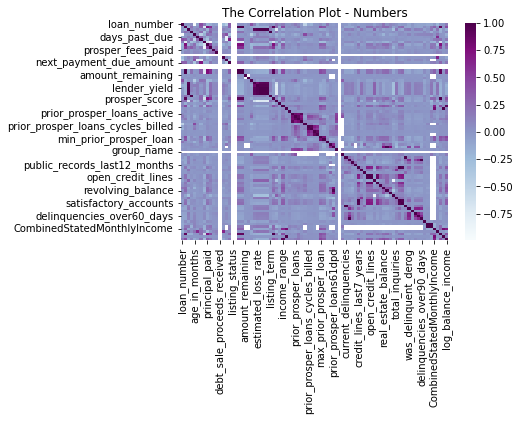

In [32]:
import os
df_num = df.select_dtypes(include='number')
matrix = df_num.corr()
sns.heatmap(matrix,  cmap='BuPu')
plt.title(f'The Correlation Plot - Numbers')
plt.savefig(os.path.join('..', 'results', 'output', 'correlation_plot_numbers.png'), dpi=150, bbox_inches='tight')
plt.show()

In [37]:
# df['']
# df_eng['EMI'] = df_eng['amount_borrowed'] / df_eng['term']

# check distribution
# sns.distplot(df_eng['EMI'])
sns.histplot(x='EMI', data=df, kde=True, bins=12)
plt.title('Count of Records with Certain distribution of EMI')
plt.savefig(os.path.join('..', 'results', 'output', 'EDA_Hist_Plot_EMI.png'), dpi=150, bbox_inches='tight')
plt.close()

In [40]:
sns.histplot(x='balance_income', data=df, kde=True, bins=50)
plt.title('Count of Records with Certain distribution of Balance Income')
plt.savefig(os.path.join('..', 'results', 'output', 'EDA_Hist_Plot_balance.png'), dpi=150, bbox_inches='tight')
plt.close()

In [41]:
sns.histplot(x='log_balance_income', data=df, kde=True, bins=50)
plt.title('Count of Records with Certain distribution of Log Balance Income')
plt.savefig(os.path.join('..', 'results', 'output', 'EDA_Hist_Plot_balance_log_balance.png'), dpi=150, bbox_inches='tight')
plt.close()